<a href="https://colab.research.google.com/github/kadlagomkar/Canoo_Scrapping_project/blob/main/Canoo_Scrapping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!pip install seaborn
!pip install matplotlib
!pip install histograms

In [2]:
#import all required libraries
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import pandas as pd
from selenium import webdriver
import numpy as np


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
def search_duckduckgo(keyword):
    search_url = (f'https://duckduckgo.com/html/?q={keyword}')

    # Use headers to search in a web browser
    headers = {
        'User-Agent': 'Chrome/91.0.4472.124',
        'Accept-Language': 'en-US,en;q=0.9',
    }

    # Send a request to DuckDuckGo
    response = requests.get(search_url, headers=headers)
    #print(response)


    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(soup)


    #return links
    links = [a['href'] for a in soup.select('a.result__a')]
    return links
    print(links)

def filter_yahoo_links(links):
    # Ensure the input is a list
    if not isinstance(links, list):
        links = [links]

    # Filter links that belong to Yahoo
    yahoo_links = [link for link in links if 'finance.yahoo.com/quote' in link]
    return yahoo_links


    # Print the filtered Yahoo links
    print("Filtered Yahoo Links:", yahoo_links)


def main():
    # Take keyword input from the user
    keyword = input("Enter a keyword to search on DuckDuckGo: ")

    # Search DuckDuckGo and get links
    search_results = search_duckduckgo(keyword)

    # Filter Yahoo links
    yahoo_links = filter_yahoo_links(search_results)

    # Print the Yahoo links
    print("Yahoo Links:")
    return yahoo_links


In [4]:
import re

if __name__ == "__main__":
    yahoo_links = main()
    #X = yahoo_links[0].rfind('/')

    yahoo_links[0]= yahoo_links[0][:36]
    X = yahoo_links[0].rfind('/')
    symbol = yahoo_links[0][X+1:]


Enter a keyword to search on DuckDuckGo: canoo
Yahoo Links:


In [5]:
goev = yf.Ticker(symbol)

In [6]:
keys_to_use = ['longName','country', 'industry', 'sector','marketCap', 'symbol','currentPrice','targetHighPrice','targetLowPrice',
               'lastFiscalYearEnd', 'nextFiscalYearEnd','totalCash','ebitda',
               'totalRevenue','totalDebt','debtToEquity','revenuePerShare','freeCashflow']
info = goev.get_info()

In [7]:
goev_info = [info[key] for key in keys_to_use]

In [8]:
goev_info

['Canoo Inc.',
 'United States',
 'Auto Manufacturers',
 'Consumer Cyclical',
 156933008,
 'GOEV',
 0.1409,
 4.0,
 0.25,
 1672444800,
 1703980800,
 12294000,
 -273868000,
 519000,
 129990000,
 78.472,
 0.001,
 -200645632]

In [9]:
all_data = [goev_info]

In [ ]:
#Canoo's competitor Rivian

rivn = yf.Ticker('RIVN')

info = rivn.get_info()

rivn_info = [info[key] for key in keys_to_use]

all_data.append(rivn_info)

In [ ]:
rivn_info

['Rivian Automotive, Inc.',
 'United States',
 'Auto Manufacturers',
 'Consumer Cyclical',
 15610803200,
 'RIVN',
 16.3,
 40.0,
 15.0,
 1672444800,
 1703980800,
 9132999680,
 -5087000064,
 3782000128,
 3246000128,
 30.762,
 4.033,
 -4486125056]

In [ ]:
all_data


[['Canoo Inc.',
  'United States',
  'Auto Manufacturers',
  'Consumer Cyclical',
  156933008,
  'GOEV',
  0.1409,
  4.0,
  0.25,
  1672444800,
  1703980800,
  12294000,
  -273868000,
  519000,
  129990000,
  78.472,
  0.001,
  -200645632],
 ['Rivian Automotive, Inc.',
  'United States',
  'Auto Manufacturers',
  'Consumer Cyclical',
  15610803200,
  'RIVN',
  16.3,
  40.0,
  15.0,
  1672444800,
  1703980800,
  9132999680,
  -5087000064,
  3782000128,
  3246000128,
  30.762,
  4.033,
  -4486125056]]

In [ ]:
pd.DataFrame(all_data, columns=keys_to_use)

,longName,country,industry,sector,marketCap,symbol,currentPrice,targetHighPrice,targetLowPrice,lastFiscalYearEnd,nextFiscalYearEnd,totalCash,ebitda,totalRevenue,totalDebt,debtToEquity,revenuePerShare,freeCashflow


In [ ]:
all_data.remove(rivn_info)

We are using comapny code as a ticker hence we can't go on and enter company code manually hence, using beutiful scop library we will fetch company codes from external website.  

In [10]:
all_data.remove(goev_info)

In [11]:
url = 'https://companiesmarketcap.com/electric-vehicles/largest-ev-companies-by-market-cap/'

page = requests.get(url)

In [12]:
soup = BeautifulSoup(page.content)

In [ ]:
print(soup.prettify())

In [ ]:
#to fetch company code

soup.find_all('div', class_='company-code')

[<div class="company-code"><span class="rank d-none"></span>TSLA</div>,
 <div class="company-code"><span class="rank d-none"></span>LI</div>,
 <div class="company-code"><span class="rank d-none"></span>RIVN</div>,
 <div class="company-code"><span class="rank d-none"></span>NIO</div>,
 <div class="company-code"><span class="rank d-none"></span>VFS</div>,
 <div class="company-code"><span class="rank d-none"></span>XPEV</div>,
 <div class="company-code"><span class="rank d-none"></span>LCID</div>,
 <div class="company-code"><span class="rank d-none"></span>1585.HK</div>,
 <div class="company-code"><span class="rank d-none"></span>PSNY</div>,
 <div class="company-code"><span class="rank d-none"></span>9863.HK</div>,
 <div class="company-code"><span class="rank d-none"></span>LVWR</div>,
 <div class="company-code"><span class="rank d-none"></span>OLECTRA.NS</div>,
 <div class="company-code"><span class="rank d-none"></span>NWTN</div>,
 <div class="company-code"><span class="rank d-none"></s

In [13]:
tickers = [div.get_text() for div in soup.find_all('div', class_='company-code')]

In [ ]:
tickers

['TSLA',
 'LI',
 'RIVN',
 'NIO',
 'VFS',
 'XPEV',
 'LCID',
 '1585.HK',
 'PSNY',
 '9863.HK',
 'LVWR',
 'OLECTRA.NS',
 'NWTN',
 'NKLA',
 'GGR',
 'LEV',
 'FSR',
 'HYLN',
 'KNDI',
 'HYZN',
 'GOEV',
 'NIU',
 'WKHS',
 'REE',
 'MULN',
 'GP',
 'XOS',
 'CENN',
 'PEV',
 'SOLO',
 'EZGO',
 'ARVL',
 'FUV',
 'UCAR',
 'FFIE',
 'ZEVY']

1. If we constantly ask Yahoo for data it will ban for going to fast so we need to slow down our program. We can do that using the sleep command from the time library

2. the other thing is we might hit an error it's possible that one of the tickers on https://companiesmarketcap.com/ website is wrong or not in Yahoo to handle that we can use a try accept block in python

In [14]:
from time import sleep

for ticker in tickers:
  try:
    yf_ticker = yf.Ticker(ticker)
    print(ticker)
    info = yf_ticker.get_info()
    data = [info[key] for key in keys_to_use]
    all_data.append(data)
    sleep(1)
  except Exception:
    print(f'Skipping Ticker {ticker}....')

TSLA
LI
RIVN
NIO
Skipping Ticker NIO....
VFS
Skipping Ticker VFS....
XPEV
Skipping Ticker XPEV....
LCID
1585.HK
PSNY
Skipping Ticker PSNY....
9863.HK
LVWR
OLECTRA.NS
Skipping Ticker OLECTRA.NS....
NWTN
Skipping Ticker NWTN....
NKLA
GGR
LEV
FSR
HYLN
KNDI
Skipping Ticker KNDI....
HYZN
Skipping Ticker HYZN....
GOEV
NIU
Skipping Ticker NIU....
WKHS
REE
MULN
Skipping Ticker MULN....
GP
XOS
CENN
Skipping Ticker CENN....
PEV
Skipping Ticker PEV....
SOLO
EZGO
Skipping Ticker EZGO....
ARVL
Skipping Ticker ARVL....
FUV
Skipping Ticker FUV....
UCAR
Skipping Ticker UCAR....
FFIE
Skipping Ticker FFIE....
ZEVY
Skipping Ticker ZEVY....


In [ ]:
len(all_data)

18

In [15]:
df = pd.DataFrame(all_data, columns=keys_to_use)

In [ ]:
df.head(15)

,longName,country,industry,sector,marketCap,symbol,currentPrice,targetHighPrice,targetLowPrice,lastFiscalYearEnd,nextFiscalYearEnd,totalCash,ebitda,totalRevenue,totalDebt,debtToEquity,revenuePerShare,freeCashflow
0,"Tesla, Inc.",United States,Auto Manufacturers,Consumer Cyclical,636798763008,TSLA,199.9500,320.06,22.57,1703980800,1735603200,29094000640,13557999616,96772997120,9573000192,15.050,30.489,2230374912
1,Li Auto Inc.,China,Auto Manufacturers,Consumer Cyclical,32469282816,LI,31.6400,75.90,35.32,1672444800,1703980800,87421411328,5923460096,99769106432,11457106944,21.237,101.734,30500816896
2,"Rivian Automotive, Inc.",United States,Auto Manufacturers,Consumer Cyclical,15610803200,RIVN,16.3000,40.00,15.00,1672444800,1703980800,9132999680,-5087000064,3782000128,3246000128,30.762,4.033,-4486125056
3,"Lucid Group, Inc.",United States,Auto Manufacturers,Consumer Cyclical,8493785600,LCID,3.7100,7.00,2.25,1672444800,1703980800,4422597120,-2866640896,695833024,2405925120,44.505,0.359,-2382652416
4,Yadea Group Holdings Ltd.,China,Auto Manufacturers,Consumer Cyclical,35569553408,1585.HK,11.8800,25.31,17.62,1672444800,1703980800,11977838592,2985819904,34049898496,1044713024,14.901,11.483,4620055552
5,"Zhejiang Leapmotor Technology Co., Ltd.",China,Auto Manufacturers,Consumer Cyclical,30081824768,9863.HK,22.5000,55.17,38.47,1672444800,1703980800,9074049024,-4628768768,13116240896,2718979072,43.006,11.810,-950696384
6,"LiveWire Group, Inc.",United States,Auto Manufacturers,Consumer Cyclical,2134813696,LVWR,10.5400,11.70,11.70,1703980800,1735603200,167904000,-110996000,38023000,1944000,0.944,0.188,-65385124
7,Nikola Corporation,United States,Farm & Heavy Construction Machinery,Industrials,856530368,NKLA,0.7399,3.00,1.00,1672444800,1703980800,364902016,-663395008,30870000,279004992,46.226,0.047,-449120256
8,Gogoro Inc.,Taiwan,Auto Manufacturers,Consumer Cyclical,483902112,GGR,1.9800,5.00,2.20,1703980800,1735603200,173884992,12539000,349846016,440308992,177.651,1.490,-5013625
9,The Lion Electric Company,Canada,Farm & Heavy Construction Machinery,Industrials,411656704,LEV,1.8200,7.00,2.00,1672444800,1703980800,35669068,-56970560,239835520,266414208,65.096,1.101,-280187072


In [ ]:
df.groupby('country').size()

country
Canada            3
China             3
Israel            1
Taiwan            1
United States    10
dtype: int64

<Axes: xlabel='country'>

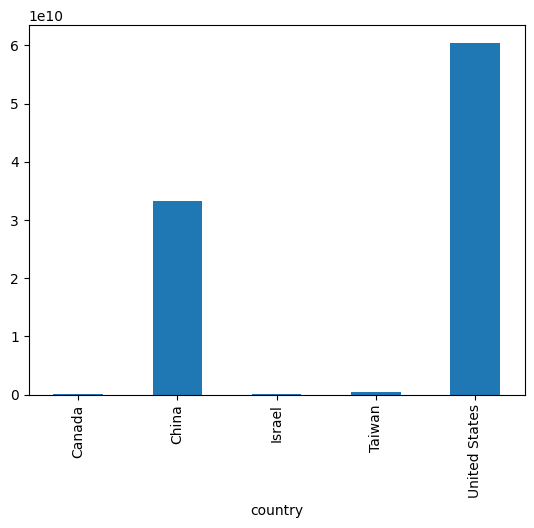

In [ ]:
df.groupby('country').marketCap.mean().plot.bar()

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import histograms as hist
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/histograms/utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [17]:
hist = goev.history(period='max')

In [ ]:
goev.financials

,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,0.0,0.0,33359040.0
Tax Rate For Calcs,0.0,0.0,0.27
Normalized EBITDA,-516665000.0,-543788000.0,-316145000.0
Total Unusual Items,21418000.0,102807000.0,123552000.0
Total Unusual Items Excluding Goodwill,21418000.0,102807000.0,123552000.0
Net Income From Continuing Operation Net Minority Interest,-487694000.0,-346768000.0,-86686000.0
Reconciled Depreciation,11554000.0,8921000.0,7125000.0
Reconciled Cost Of Revenue,0.0,0.0,670000.0
EBITDA,-495247000.0,-440981000.0,-192593000.0
EBIT,-506801000.0,-449902000.0,-199718000.0


In [18]:
def scrape_and_save_financials(ticker, filename):
    # Fetch financials data
    financials = yf.Ticker(ticker).financials

    # Save financials data to CSV
    financials.to_csv(filename)

# Example usage
ticker_symbol = 'GOEV'  # Replace with your desired ticker symbol
output_filename = 'yearly_financials_data.csv'

scrape_and_save_financials(ticker_symbol, output_filename)

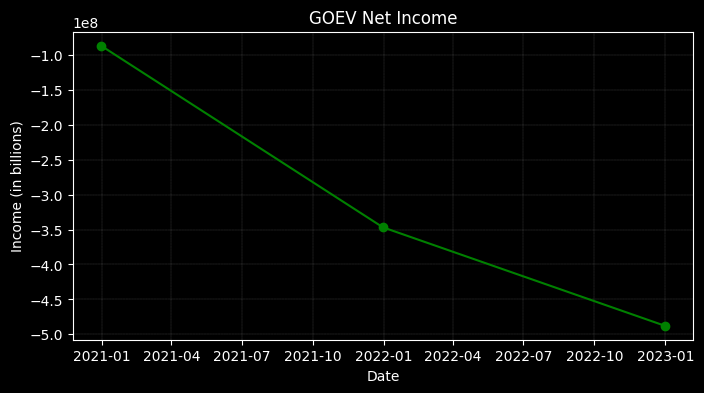

In [ ]:
data = {'Date': ['2022-12-31', '2021-12-31', '2020-12-31'],
        'Revenue': [-487694000.0, -346768000.0, -86686000.0]}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 4))
plt.style.use('dark_background')
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='green')
plt.title('GOEV Net Income')
plt.xlabel('Date')
plt.ylabel('Income (in billions)')
plt.grid(color='white', linestyle='--', linewidth=0.1)

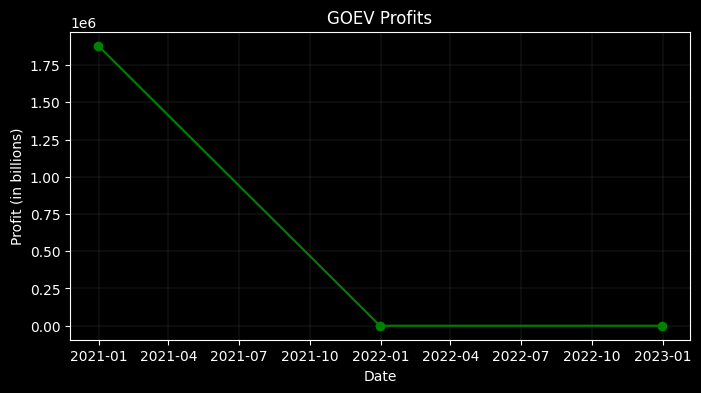

In [ ]:
data = {'Date': ['2022-12-31', '2021-12-31', '2020-12-31'],
        'Profit': [0, 0, 1880000.0]}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 4))
plt.style.use('dark_background')
plt.plot(df['Date'], df['Profit'], marker='o', linestyle='-', color='green')
plt.title('GOEV Profits')
plt.xlabel('Date')
plt.ylabel('Profit (in billions)')
plt.grid(color='white', linestyle='--', linewidth=0.1)

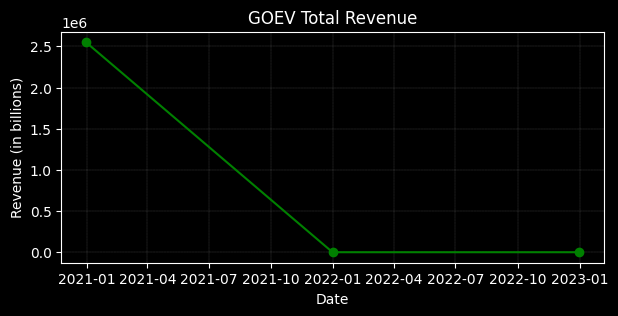

In [ ]:
data = {'Date': ['2022-12-31', '2021-12-31', '2020-12-31'],
        'Revenue': [0.0, 0.0, 2550000.0]}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(7, 3))
plt.style.use('dark_background')
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='green')
plt.title('GOEV Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in billions)')
plt.grid(color='white', linestyle='--', linewidth=0.1)

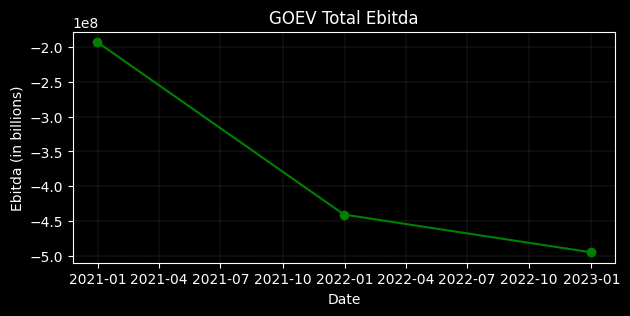

In [ ]:
data = {'Date': ['2022-12-31', '2021-12-31', '2020-12-31'],
        'Ebitda': [-495247000.0, -440981000.0, -192593000.0]}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(7, 3))
plt.style.use('dark_background')
plt.plot(df['Date'], df['Ebitda'], marker='o', linestyle='-', color='green')
plt.title('GOEV Total Ebitda')
plt.xlabel('Date')
plt.ylabel('Ebitda (in billions)')
plt.grid(color='white', linestyle='--', linewidth=0.1)

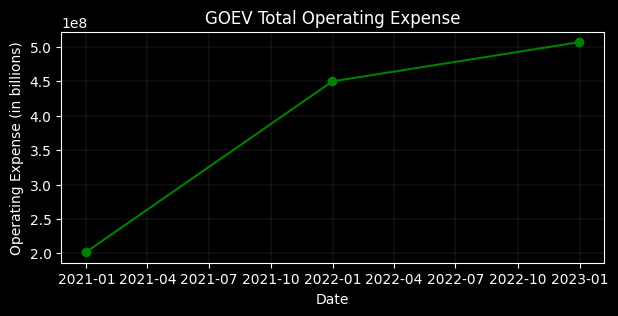

In [ ]:
#Operating Expense
data = {'Date': ['2022-12-31', '2021-12-31', '2020-12-31'],
        'Operating Expense': [506801000.0, 449902000.0, 201598000.0]}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(7, 3))
plt.style.use('dark_background')
plt.plot(df['Date'], df['Operating Expense'], marker='o', linestyle='-', color='green')
plt.title('GOEV Total Operating Expense')
plt.xlabel('Date')
plt.ylabel('Operating Expense (in billions)')
plt.grid(color='white', linestyle='--', linewidth=0.1)

In [ ]:
goev.quarterly_financials


,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.0,0.0,0.0,0.0
Normalized EBITDA,-47740000.0,-73736000.0,-78969000.0,-83282000.0
Total Unusual Items,-58544000.0,4733000.0,-6892000.0,2644000.0
Total Unusual Items Excluding Goodwill,-58544000.0,4733000.0,-6892000.0,2644000.0
Net Income From Continuing Operation Net Minority Interest,-111974000.0,-70870000.0,-90732000.0,-80230000.0
Reconciled Depreciation,1495000.0,4562000.0,4575000.0,2534000.0
Reconciled Cost Of Revenue,903000.0,0.0,0.0,0.0
EBITDA,-106284000.0,-69003000.0,-85861000.0,-80638000.0
EBIT,-107779000.0,-73565000.0,-90436000.0,-83172000.0


In [ ]:
def scrape_and_save_quarterly_financials(ticker, filename):
    # Fetch quarterly financials data
    quarterly_financials = yf.Ticker(ticker).quarterly_financials

    # Save quarterly financials data to CSV
    quarterly_financials.to_csv(filename)

# Example usage
ticker_symbol = 'GOEV'  # Replace with your desired ticker symbol
output_filename = 'quarterly_financials_data.csv'

scrape_and_save_quarterly_financials(ticker_symbol, output_filename)

In [ ]:
goev.major_holders

Breakdown,Value
insidersPercentHeld,0.02887
institutionsPercentHeld,0.13393
institutionsFloatPercentHeld,0.13791
institutionsCount,156.00000


In [ ]:
goev.institutional_holders


,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0306,19422753,9311267
1,2023-03-31,Infini Capital Management Ltd,0.0264,16740371,10924766
2,2023-06-30,Blackrock Inc.,0.0132,8394098,4024130
3,2023-06-30,"Geode Capital Management, LLC",0.0064,4036393,1935046
4,2023-06-30,Millennium Management Llc,0.0064,4041521,1937505
5,2023-06-30,Qube Research & Technologies Ltd,0.0063,4009949,1922369
6,2023-06-30,"Charles Schwab Investment Management, Inc.",0.0027,1735917,832198
7,2023-06-30,State Street Corporation,0.0026,1631244,782018
8,2023-06-30,"Renaissance Technologies, LLC",0.0020,1240700,594791
9,2023-06-30,Morgan Stanley,0.0016,1032714,495083


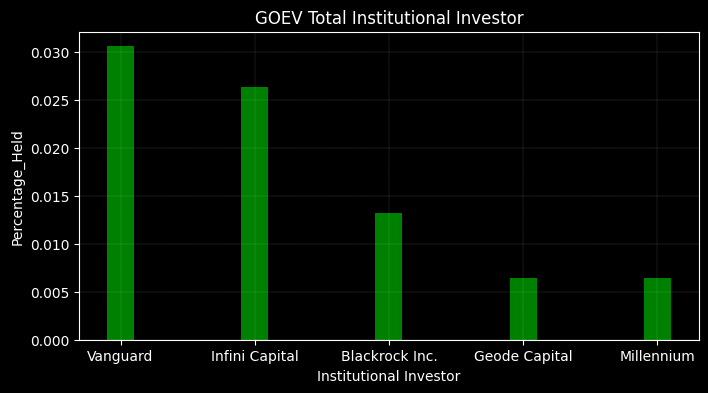

In [ ]:
data = {
    'Institutional Investor': ['Vanguard', 'Infini Capital', 'Blackrock Inc.', 'Geode Capital', 'Millennium'],
    'Percentage_Held': [0.0306, 0.0264, 0.0132, 0.0064, 0.0064]
}
df = pd.DataFrame(data)

bar_width = 0.2
plt.figure(figsize=(8, 4))
plt.style.use('dark_background')
plt.bar(df['Institutional Investor'], df['Percentage_Held'],  width=bar_width, linestyle='-', color='green')
plt.title('GOEV Total Institutional Investor')
plt.xlabel('Institutional Investor')
plt.ylabel('Percentage_Held')
plt.grid(color='white', linestyle='--', linewidth=0.1)


In [ ]:
goev.balance_sheet

,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,355388000.0,238578366.0,235753437.0
Share Issued,355388000.0,238578366.0,235753437.0
Total Debt,73437000.0,13826000.0,20649000.0
Tangible Book Value,236573000.0,343999000.0,565242000.0
Invested Capital,271402000.0,343999000.0,572185000.0
Working Capital,-165959000.0,155114000.0,681017000.0
Net Tangible Assets,236573000.0,343999000.0,565242000.0
Capital Lease Obligations,38608000.0,13826000.0,13706000.0
Common Stock Equity,236573000.0,343999000.0,565242000.0
Total Capitalization,236573000.0,343999000.0,572185000.0


In [ ]:
goev.cashflow

,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,-497745000.0,-437410000.0,-114612000.0
Repurchase Of Capital Stock,-12000.0,-17000.0,-64000.0
Repayment Of Debt,0.0,-6943000.0,-47000.0
Issuance Of Debt,NaN,0.0,7064000.0
Issuance Of Capital Stock,57663000.0,0.0,180507000.0
Capital Expenditure,-97270000.0,-136594000.0,-7558000.0
Interest Paid Supplemental Data,0.0,60000.0,0.0
End Cash Position,50615000.0,227492000.0,702422000.0
Beginning Cash Position,227492000.0,702422000.0,29507000.0
Changes In Cash,-176877000.0,-474930000.0,672915000.0


In [ ]:
goev.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,0,0,0,0,0
1,-1m,1,3,1,0,0
2,-2m,1,3,1,0,0
3,-3m,0,0,0,0,0


In [ ]:
goev.calendar

{'Earnings Date': [datetime.date(2024, 3, 28), datetime.date(2024, 4, 1)],
 'Earnings High': -0.06,
 'Earnings Low': -0.09,
 'Earnings Average': -0.08,
 'Revenue High': 1020000,
 'Revenue Low': 200000,
 'Revenue Average': 720000}

In [ ]:
goev.options

('2024-02-16',
 '2024-02-23',
 '2024-03-01',
 '2024-03-08',
 '2024-03-15',
 '2024-03-22',
 '2024-03-28',
 '2024-04-19',
 '2024-05-17',
 '2024-08-16',
 '2025-01-17',
 '2026-01-16')

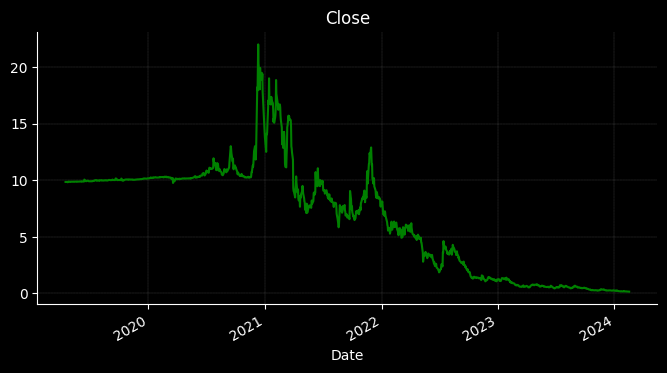

In [ ]:
plt.style.use('dark_background')
hist['Close'].plot(kind='line', figsize=(8, 4), title='Close', color='green')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(color='white', linestyle='--', linewidth=0.1)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

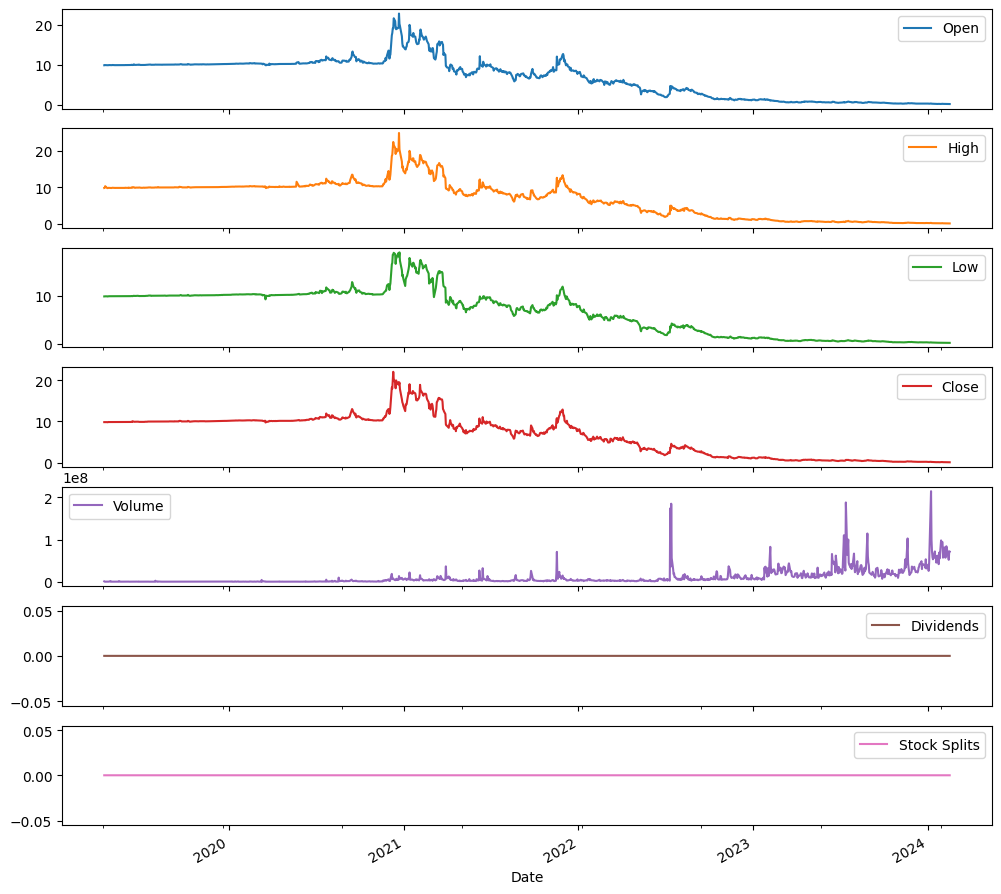

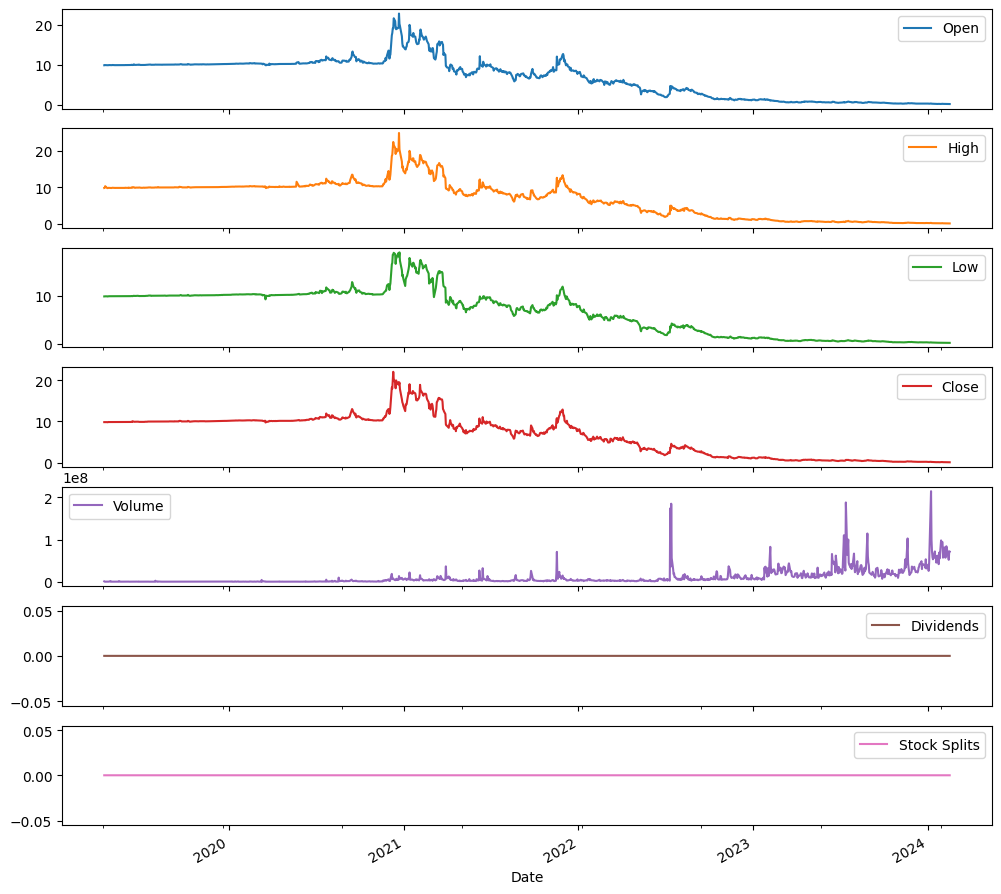

In [ ]:
hist.plot(kind = 'line', figsize=(12,12), subplots = True);

In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
data = {
    'Companies': ['Canoo', 'Rivian', 'Fisker', 'Lucid'],
    'Revenue': [519000, 3782000128, 73129000, 695833024]
}
df = pd.DataFrame(data)

# Convert Market Capital to millions
df['Revenue (Millions)'] = df['Revenue'] / 1_000_000

# Create a dark-themed bar graph
fig = px.bar(df,
             x='Companies',
             y='Revenue (Millions)',
             color='Revenue (Millions)',
             color_continuous_scale='darkmint',  # Dark green color scale
             labels={'Revenue (Millions)': 'Revenue (Millions)'},
             title='Revenue')

# Set the template to a dark theme
fig.update_layout(template='plotly_dark')

# Set the size of the figure
fig.update_layout(height=400, width=800)

# Add text annotations on top of each bar
for i, row in df.iterrows():
    fig.add_annotation(
        x=row['Companies'],
        y=row['Revenue (Millions)'],
        text=f"${row['Revenue (Millions)']:.2f}M",  # Format the number as currency with 2 decimal places
        showarrow=False,
        font=dict(color='white', size=12)
    )

# Show the plot
fig.show()



In [ ]:

data = {
    'Companies': ['Canoo', 'Rivian', 'Fisker', 'Lucid'],
    'Market Capital': [156933008, 15610803200, 391316288, 8493785600]
}
df = pd.DataFrame(data)

# Create a treemap
fig = px.bar(df,
             x='Companies',
             y='Market Capital',
             color='Market Capital',
             color_continuous_scale='darkmint',
             labels={'Market Capital': 'Market Capitalization'},
             title='Market Cap Bar Graph')
# Set the template to a dark theme
fig.update_layout(template='plotly_dark')

# Set the size of the figure
fig.update_layout(height=400, width=800)

# Add text annotations on top of each bar
for i, row in df.iterrows():
    fig.add_annotation(
        x=row['Companies'],
        y=row['Market Capital'],
        text=f"{row['Market Capital']:,}",  # Format the number with comma separators
        showarrow=False,
        font=dict(color='white', size=12)
    )

# Show the plot
fig.show()


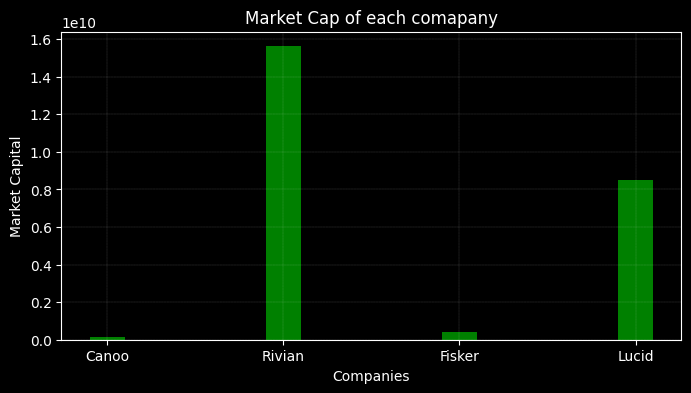

In [ ]:
data = {
    'Companies': ['Canoo', 'Rivian', 'Fisker', 'Lucid'],
    'Market Capital': [156933008, 15610803200, 391316288, 8493785600]
}
df = pd.DataFrame(data)

bar_width = 0.2
plt.figure(figsize=(8, 4))
plt.style.use('dark_background')
plt.bar(df['Companies'], df['Market Capital'],  width=bar_width, linestyle='-', color='green')
plt.title('Market Cap of each comapany')
plt.xlabel('Companies')
plt.ylabel('Market Capital')
plt.grid(color='white', linestyle='--', linewidth=0.1)
